In [0]:
# PRELIMINARY EXECUTION

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore");

def my_plot_Gaussians(mean, cov, color):
  # This codes makes a trick analogue to the use of meshgrid in MATLAB.
  # It builds the contour plot of a bivariate Gaussian distribution
  # having mean vector and covariance matrix specified in the arguments.
  #
  # step 1: get the boundaries of the grid
  ax = plt.gca(); xlim = ax.get_xlim(); ylim = ax.get_ylim();
  # step 2: create the grid
  xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
  # step 3: stack the grid
  xx_yy = np.dstack((xx, yy))
  # step 4: build the plot
  rv = multivariate_normal(mean, cov)
  ax.contourf(xx, yy, rv.pdf(xx_yy), colors=color, alpha=0.2,  levels=[0.01, 0.9])

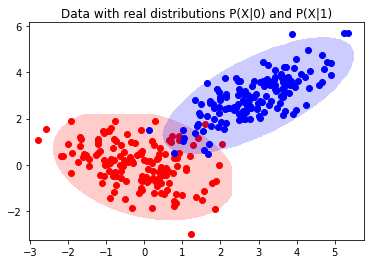

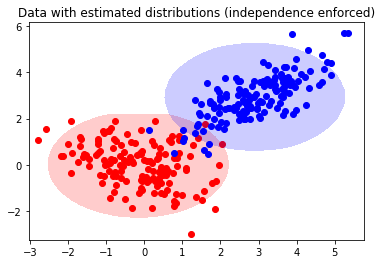

In [0]:
# EXAMPLE 1 - GAUSSIAN NAIVE BAYES WORKS (PART I/II)

# PROBLEM DESCRIPTION

# We have two classes: class 0 and class 1.

# The distribution P(X|0) is a correlated bivariate Gaussian distribution having:
mean_0 = [0, 0];
cov_0 = [[1, -0.3], [-0.3, 1]];  
# We generate some data from this distribution:
XX_0   = np.random.multivariate_normal( mean_0, cov_0, 150);

# The distribution P(X|1) is a significantly correlated bivariate Gaussian distribution having:
mean_1 = [3, 3];
cov_1 = [[1, 0.7], [0.7, 1]];
# We generate some data from this distribution:
XX_1   = np.random.multivariate_normal( mean_1, cov_1, 150);

# Now we plot the generated data and the controur plot of the original distributions P(X|0) and P(X|1): 
# RECALL: the equidensity contours of a non-singular multivariate Gaussian distribution are ellipsoids
plt.figure(); plt.title('Data with real distributions P(X|0) and P(X|1)')
plt.scatter(XX_0[:, 0], XX_0[:, 1], color='r'); my_plot_Gaussians(mean_0, cov_0, 'r')
plt.scatter(XX_1[:, 0], XX_1[:, 1], color='b'); my_plot_Gaussians(mean_1, cov_1, 'b')

# The Gaussian Naive Bayes Classifier discards the information coming from the correlation between features. 
# In fact, it estimates the bivariate Gaussian distribution that best fits the data ASSUMING that it has a diagonal covariance matrix. 

# Here we estimate the covariance-free Gaussian distributions:
mean_0_hat  = [XX_0[:,0].mean(), XX_0[:,1].mean()]; cov_0_hat = [XX_0[:,0].std(),  XX_0[:,1].std()];
mean_1_hat  = [XX_1[:,0].mean(), XX_1[:,1].mean()]; cov_1_hat = [XX_1[:,0].std(),  XX_1[:,1].std()];

# The result is shown in the second figure below. We note that despite the discarded information the data continue to be well separable...
plt.figure(); plt.title('Data with estimated distributions (independence enforced)')
plt.scatter(XX_0[:, 0], XX_0[:, 1], color='r'); my_plot_Gaussians(mean_0_hat, cov_0_hat, 'r')
plt.scatter(XX_1[:, 0], XX_1[:, 1], color='b'); my_plot_Gaussians(mean_1_hat, cov_1_hat, 'b')
# ...and in fact the classifier works well, as it is shown in PART II below.


In [0]:
# EXAMPLE 1 - GAUSSIAN NAIVE BAYES WORKS (PART II/II)

# Generating the labels
YY_0 = np.zeros( (150,1) ); YY_1 = np.ones( (150, 1))

# merging the data...
XX = np.vstack( (XX_0, XX_1) ); YY = np.vstack( (YY_0, YY_1) );
# ... and re-splitting them:
XX_train, XX_test, YY_train, YY_test = train_test_split( XX, YY, test_size=0.5 );

# classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XX_test, YY_test);
YY_estimated=gnb.fit(XX_train, YY_train).predict(XX_test)

# print results
print('Confusion matrix:')
print(confusion_matrix(YY_test,YY_estimated))
print('\n\nClassifier performance metrics:')
print(classification_report(YY_test,YY_estimated))

Confusion matrix:
[[74  0]
 [ 5 71]]


Classifier performance metrics:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        74
         1.0       1.00      0.93      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



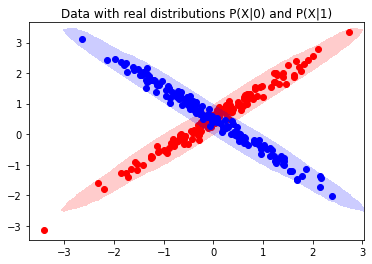

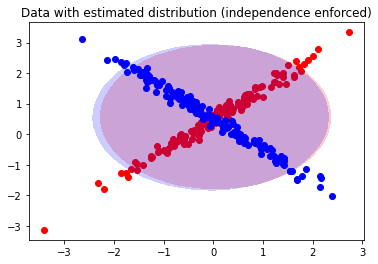

In [0]:
# EXAMPLE 2 - GAUSSIAN NAIVE BAYES DOESN'T WORK (Part I/II)

# Anyway, there are situations when the information coming from correlation is essential! The limit case is the following one:
mean_0 = [0, 0.5]; cov_0 = [[1, +0.99], [+0.99, 1]];  XX_0   = np.random.multivariate_normal( mean_0, cov_0, 150);
mean_1 = [0, 0.5]; cov_1 = [[1, -0.99], [-0.99, 1]];  XX_1   = np.random.multivariate_normal( mean_1, cov_1, 150);

# By projecting the bivariate Gaussian distributions of the two classes we get the same marginals! 
# In particular:
#   - on the x axis we get two identical Gaussians with mean 0 and variance 1,
#   - on the y axis we get two identical Gaussians with mean 0.5 and variance 1

# So, ignoring correlation means ignoring all the input information!
plt.figure(); plt.title('Data with real distributions P(X|0) and P(X|1)')
plt.scatter(XX_0[:, 0], XX_0[:, 1], color='r'); my_plot_Gaussians(mean_0, cov_0, 'r')
plt.scatter(XX_1[:, 0], XX_1[:, 1], color='b'); my_plot_Gaussians(mean_1, cov_1, 'b')

mean_0_hat  = [XX_0[:,0].mean(), XX_0[:,1].mean()]; cov_0_hat = [XX_0[:,0].std(),  XX_0[:,1].std()];
mean_1_hat  = [XX_1[:,0].mean(), XX_1[:,1].mean()]; cov_1_hat = [XX_1[:,0].std(),  XX_1[:,1].std()];

plt.figure(); plt.title('Data with estimated distribution (independence enforced)')
plt.scatter(XX_0[:, 0], XX_0[:, 1], color='r'); my_plot_Gaussians(mean_0_hat, cov_0_hat, 'r')
plt.scatter(XX_1[:, 0], XX_1[:, 1], color='b'); my_plot_Gaussians(mean_1_hat, cov_1_hat, 'b')

# If we use the Gaussian Naive Bayes classifier, we get very bad results. This is shown in PART II below.

In [0]:
# EXAMPLE 2 - GAUSSIAN NAIVE BAYES DOESN'T WORK (Part II/II)

# generating the labels
YY_0 = np.zeros( (150,1) ); YY_1 = np.ones( (150, 1))

# merging the data...
XX = np.vstack( (XX_0, XX_1) ); YY = np.vstack( (YY_0, YY_1) );
# ... and re-splitting them:
XX_train, XX_test, YY_train, YY_test = train_test_split( XX, YY, test_size=0.5 );

# classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XX_test, YY_test);
YY_estimated=gnb.fit(XX_train, YY_train).predict(XX_test)

# print results
print('Confusion matrix:')
print(confusion_matrix(YY_test,YY_estimated))
print('\n\nClassifier performance metrics:')
print(classification_report(YY_test,YY_estimated))

Confusion matrix:
[[50 27]
 [39 34]]


Classifier performance metrics:
              precision    recall  f1-score   support

         0.0       0.56      0.65      0.60        77
         1.0       0.56      0.47      0.51        73

    accuracy                           0.56       150
   macro avg       0.56      0.56      0.55       150
weighted avg       0.56      0.56      0.56       150



In [0]:
# EXAMPLE 2 - MULTINOMIAL NAIVE BAYES for TOPIC RECOGNITION IN A TEXT

# In this example we implement a classifier that, taken an input string of text, tries to "understand" which topic is discussed: religion or space?

# The dataset, and its use, is fully documented at: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

# This classifier is an example of Multinomial Naive Bayes, and it estimates the p.m.f. basing on the so-called "bag-of-words model"

# downloading the data
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups();
categories = ['sci.space', 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
XX_train = vectorizer.fit_transform(newsgroups_train.data)
YY_train = newsgroups_train.target;
XX_test = vectorizer.transform(newsgroups_test.data)
YY_test = newsgroups_test.target;

# classification
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
YY_estimated=mnb.fit(XX_train, YY_train).predict(XX_test);

# print results
print('Confusion matrix:')
print(confusion_matrix(YY_test,YY_estimated))
print('\n\nClassifier performance metrics:')
print(classification_report(YY_test,YY_estimated))

# Now it is your turn: write here the text that you want to classify!
# You have just to call the following anonymous function with the text you have chosen:
my_text_category = lambda my_str : print( '\'' + my_str + '\'' + '   ---->   ' + categories[mnb.predict(vectorizer.transform([my_str]))[0]]);
# Here are some examples:
my_text_category('sending a payload to the ISS')
my_text_category('discussing faith vs atheism');
my_text_category('God created the Solar System'); # ???

Confusion matrix:
[[394   0]
 [ 56 195]]


Classifier performance metrics:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       394
           1       1.00      0.78      0.87       251

    accuracy                           0.91       645
   macro avg       0.94      0.89      0.90       645
weighted avg       0.92      0.91      0.91       645

'sending a payload to the ISS'   ---->   sci.space
'discussing faith vs atheism'   ---->   talk.religion.misc
'God created the Solar System'   ---->   sci.space
